In [5]:
from matplotlib import pyplot as plt
from pycocotools.coco import COCO
from pycocotools import mask as maskUtils
from upolygon import find_contours
from PIL import Image
import numpy as np
import yaml
import os

In [6]:
coco = COCO('/teamspace/studios/this_studio/endoscapes/train_seg/annotation_coco.json')
img_dir = '/teamspace/studios/this_studio/endoscapes/train_seg'

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [3]:
print("images len:", len(coco.imgs))

images len: 343


In [6]:
#get first 5 ids from coco.imgs
img_ids = list(coco.imgs.keys())[:5]
coco.imgs[img_ids[0]]

{'file_name': '4_22450.jpg',
 'height': 480,
 'width': 854,
 'id': 4022450,
 'is_det_keyframe': True,
 'ds': [0.0, 0.0, 0.0],
 'video_id': 4,
 'frame_id': None,
 'is_ds_keyframe': True}

4_22450.jpg


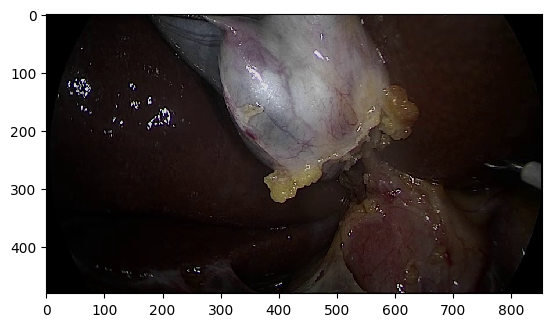

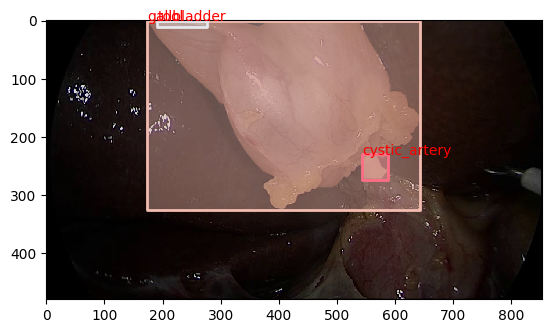

4_23200.jpg


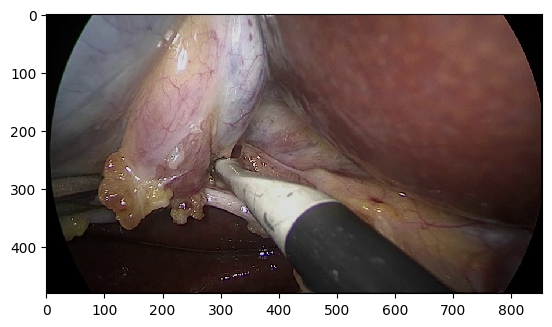

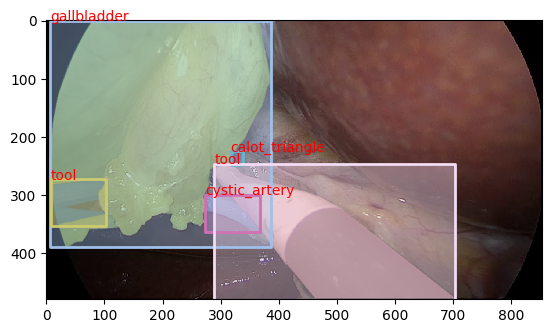

4_23950.jpg


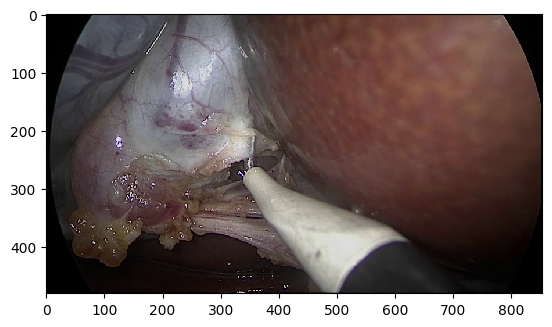

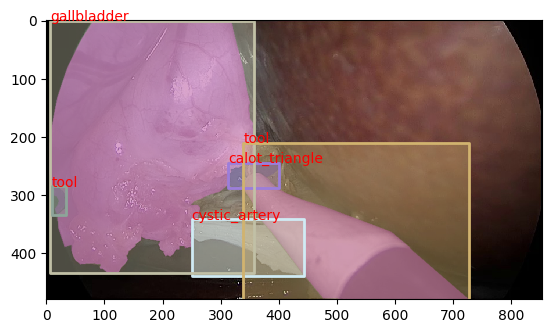

4_24700.jpg


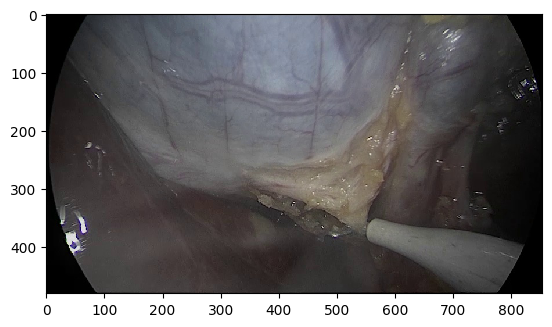

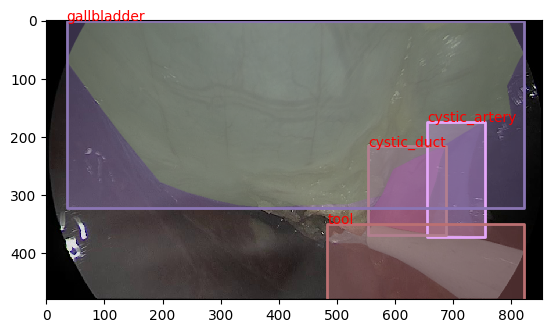

4_25450.jpg


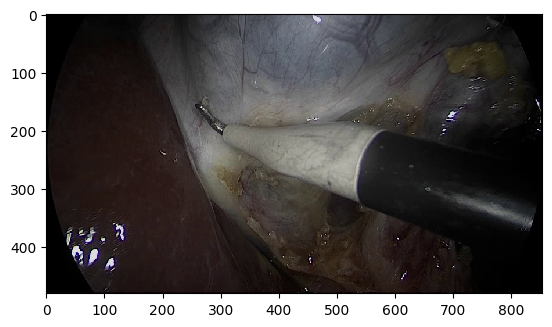

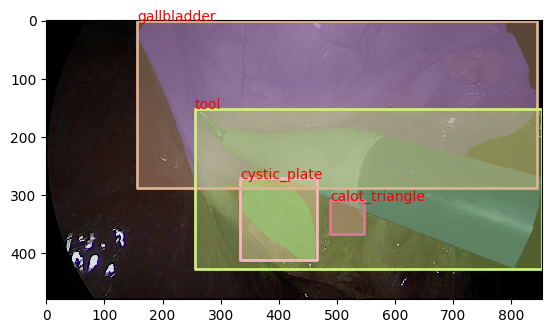

In [8]:

cat_ids = coco.getCatIds()

for (i, id) in enumerate(img_ids):
    img = coco.imgs[id]
    print(img['file_name'])
    image = np.array(Image.open(os.path.join(img_dir, img['file_name'])))
    plt.imshow(image, interpolation='nearest')
    plt.show()
    plt.imshow(image, interpolation='nearest')
    anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
    anns = coco.loadAnns(anns_ids)
    coco.showAnns(anns, draw_bbox=True)
    # add labels to anns
    for ann in anns:
        plt.text(ann['bbox'][0], ann['bbox'][1], coco.loadCats(ann['category_id'])[0]['name'], color='red')
    plt.show()

## Annotations

In [ ]:
ann = anns[1]
ann

{'segmentation': {'size': [480, 854],
  'counts': 'daU78[>a0ZOf0M3L4L2OO001O00001O000010OO101O001O000O2O00001O000O2O001O00001N1O1O2O0O1O2N1O2N100O2N1O1VO[B8W>O100O1O2N1O1O100O1OZQ`4'},
 'iscrowd': 0,
 'category_id': 2,
 'bbox': [489.0, 309.0, 57.0, 58.0],
 'area': 2106,
 'id': 40254501,
 'image_id': 4025450}

In [ ]:
rle = [ann['segmentation']]
#rle = [ann['segmentation'] for ann in anns]
mask = maskUtils.decode(rle)

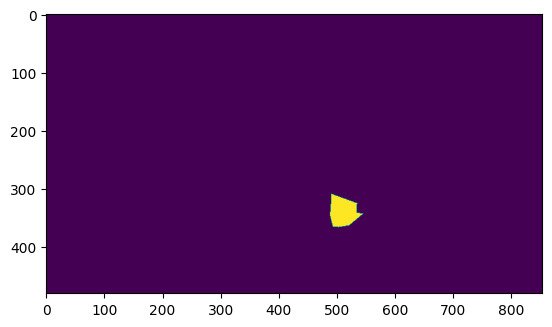

In [8]:
plt.imshow(mask[:, :, 0])